In [263]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [264]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

#Read the url by using a read_csv
df=pd.read_csv(url,usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare'])

#Get the data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [266]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [267]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

age has null value

In [268]:
#Get the missing values in the data

def missing_data(data):
    df=pd.DataFrame({'missing values':data.isnull().sum(),"percentage of missing":(data.isnull().sum()/data.shape[0])/2})
    return df


In [269]:
missing_data(df)

,missing values,percentage of missing
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
Age,177,0.099327
SibSp,0,0.000000
Parch,0,0.000000
Fare,0,0.000000


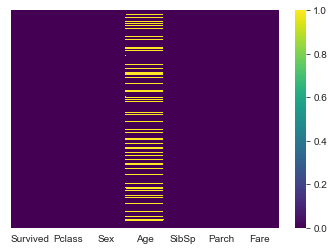

In [270]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')


The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation.

# Visualization

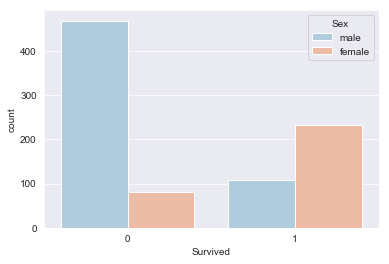

In [271]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')


##  female survived more than mens

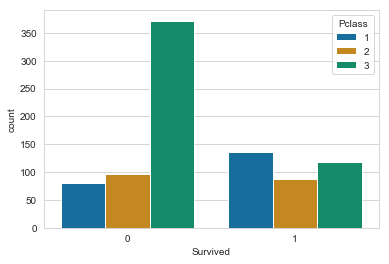

In [272]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='colorblind')  #A palette is a range of colors(deep, muted, bright, pastel, dark, colorblind)

people in passenger class 1 survived more and passenger class 3 people died more

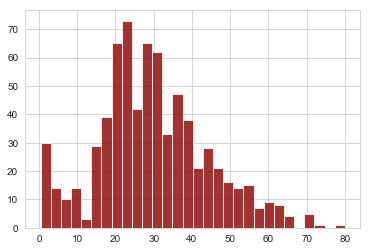

In [273]:
df['Age'].hist(bins=30,color='darkred',alpha=0.8)  # distribution of Age   aplha is just transparency 1= dark color

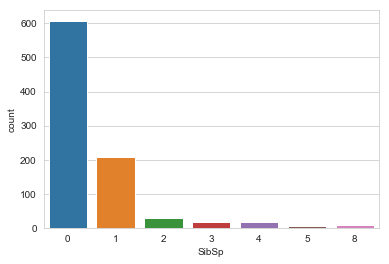

In [274]:
sns.countplot(x='SibSp',data=df)

here we can see , maximum people didnt had any sibling or spouse 

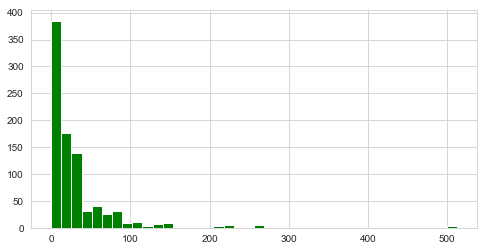

In [275]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [276]:
#Check the realtionship between the numerical and cateorical data with the help of catplot
def plot(df,variable,target='Survived'):
    plt.figure(figsize=(9,7))
    cat_plot=sns.catplot(x=target,y=variable,data=df,kind='boxen',palette='dark')
    plt.title('Relation ship between the '+variable+' and '+target)

<Figure size 648x504 with 0 Axes>

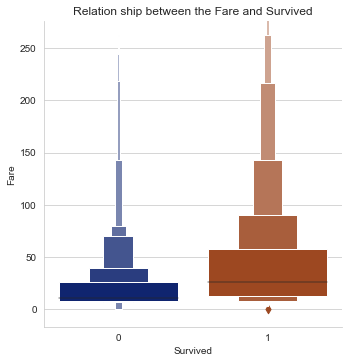

In [277]:

plot(df,'Fare')

# Filling age data


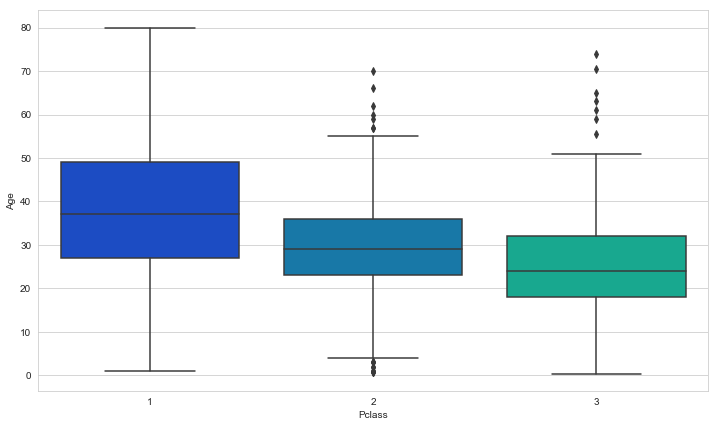

In [278]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')



older people prefer higher class , pclass 1 has most people from 28-49 age , pclass 2 people 20-35 , pclass 3 people younger 
soo now will distribute age according to pclass mean and try to fill missing age

In [279]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

        
    else:
        return Age

In [280]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

In [281]:
df['Age'].isnull().sum()

0

no null value in age

# converting categeorical variable

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [283]:
sex = pd.get_dummies(df['Sex'],drop_first=True)

In [284]:
df.drop(['Sex'],axis=1,inplace=True)

In [285]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [286]:
df = pd.concat([df,sex],axis=1)

In [287]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [288]:
#Check the correlation with the help of heatmap
def heatmap(df):
    plt.figure(figsize=(10,8))
    cr=sns.heatmap(df.corr(),annot=True,cmap='viridis')
    cr.set_title("Correlation between the variables")
    print(df.corr())
    plt.show()

          Survived    Pclass       Age     SibSp     Parch      Fare      male
Survived  1.000000 -0.338481 -0.047255 -0.035322  0.081629  0.257307 -0.543351
Pclass   -0.338481  1.000000 -0.408487  0.083081  0.018443 -0.549500  0.131900
Age      -0.047255 -0.408487  1.000000 -0.243526 -0.171095  0.123784  0.078421
SibSp    -0.035322  0.083081 -0.243526  1.000000  0.414838  0.159651 -0.114631
Parch     0.081629  0.018443 -0.171095  0.414838  1.000000  0.216225 -0.245489
Fare      0.257307 -0.549500  0.123784  0.159651  0.216225  1.000000 -0.182333
male     -0.543351  0.131900  0.078421 -0.114631 -0.245489 -0.182333  1.000000


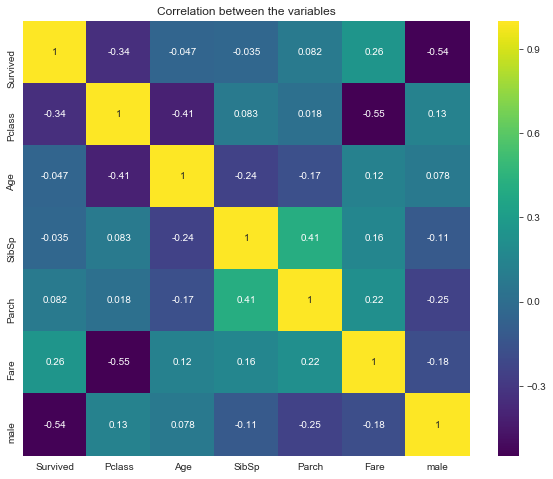

In [289]:
heatmap(df)

In [290]:
#Split the data in to x and y
x=df.drop(columns=['Survived'],axis=1)
y=df['Survived']

In [291]:

#Splitting the data in to train and test split tht 80/20 rule 80% For training set and remaning for test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=355)

In [292]:
#fitting to model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [293]:
clf.score(x_train,y_train)

1.0

In [294]:
py_pred = clf.predict(x_test)

In [295]:
# accuracy of our classification tree
clf.score(x_test,y_test)             #why clf is not stable

0.7110799438990182

# Hyper parameter tuning

lets do scaling first

In [296]:
scalar = StandardScaler()

x_transform = scalar.fit_transform(x)

In [297]:
x_train,x_test,y_train,y_test = train_test_split(x_transform,y,test_size = 0.80, random_state= 355)

In [298]:
clf.score(x_test,y_test)   # q3 ask why clf chnaging here 

0.40813464235624125

In [299]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
#grid_param = {
#    'criterion': ['gini', 'entropy'],
#    'max_depth' : range(2,32,1),
#    'min_samples_leaf' : range(1,10,1),
#    'min_samples_split': range(2,10,1),
#    'splitter' : ['best', 'random']
#    
#}

In [300]:
#grid_search = GridSearchCV(estimator=clf,
             #        param_grid=grid_param,
            #         cv=5,
           #         n_jobs =-1)

In [301]:
#grid_search.fit(x_train,y_train)

In [302]:
#clf.score(x_test,y_test)

In [309]:
DecisionTreeClassifier()
param={'criterion':['gini','entrpoy'],
      'splitter':['best','random'],
      'max_depth':[2,5,8,10,15],
      'min_samples_split':[2,4,6,8,9],
      'max_features':['auto','sqrt']}

In [310]:
random=RandomizedSearchCV(clf,param_distributions=param,cv=10,verbose=3,scoring='accuracy',n_jobs=-1,n_iter=10)

In [311]:
random.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Sachi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [0.79673203 0.74052288 0.71895425        nan        nan        nan
 0.7745098  0.71797386 0.78594771 0.79248366]
  category=UserWarning


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entrpoy'],
                                        'max_depth': [2, 5, 8, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 4, 6, 8, 9],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=3)

In [312]:
random.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_split=4,
                       splitter='random')

In [313]:

random.best_params_

{'splitter': 'random',
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini'}

In [314]:
hyp_random=random.best_estimator_
hyp_random_pred=hyp_random.predict(x_test)

#Get the score
print('Trianing set: ',hyp_random.score(x_train,y_train))
print('Testing set: ',hyp_random.score(x_test,y_test))

Trianing set:  0.8876404494382022
Testing set:  0.7377279102384292
